### [Epipolar Geometry](https://docs.opencv.org/3.4/da/de9/tutorial_py_epipolar_geometry.html)
Let's understand epipolar geometry and epipolar constraint.

#### Goal
In this section,

* We will learn about the basics of multiview geometry
* We will see what is epipole, epipolar lines, epipolar constraint etc.

#### Basic Concepts
핀홀 카메라를 사용하여 이미지를 찍을 때 이미지의 심도 같은 중요한 정보가 부족 합니다. 또는 3D에서 2D로 변환 때문에 카메라에서 이미지의 각 점까지의 거리가 어느 정도 일까요? 따라서 이러한 카메라를 사용하여 심도 정보를 찾을 수 있는지 여부는 중요한 질문입니다. 그리고 대답은 하나 이상의 카메라를 사용하는 것입니다. 우리의 눈은 스테레오 비전이라고 하는 두 개의 카메라 (두 눈)를 사용하는 것과 비슷한 방식으로 작동합니다. 그럼 이 분야에서 OpenCV가 제공하는 것을 살펴 봅시다.

(*OpenCV 를 배우는* Gary Bradsky는이 분야에서 많은 정보를 가지고 있습니다.)

심도 이미지로 이동하기 전에 먼저 다중 뷰 형상의 몇 가지 기본 개념을 이해해 봅시다. 이 섹션에서는 에피 폴라 지오메트리에 대해 다룰 것입니다. 동일한 장면의 이미지를 촬영하는 두 대의 카메라로 기본 설정을 보여주는 아래 이미지를 참조하십시오.

![](epipolar.jpg)

왼쪽 카메라 만 사용하는 경우 \\(xOXOXx'\\) 점에 해당하는 3D점을 찾을 수 없습니다.

왼쪽 카메라 만 사용하는 경우 \\(OX\\) 선의 모든 점이 이미지면의 동일한 점에 투영되므로 이미지에서 점 \\(x\\)에 해당하는 3D 점을 찾을 수 없습니다. 그러나 올바른 이미지도 고려하십시오. 이제 라인 \\(OX\\)상의 다른 점들은 오른쪽 평면에서 다른 점 \\((x')\\)으로 투영됩니다. 따라서이 두 이미지를 사용하여 정확한 3D 포인트를 삼각형화할 수 있습니다. 이것은 전체적인 생각입니다

OX에서 다른 점을 투영하면 오른쪽면에 선이 그려집니다 (선 \\(l'\\)). 점 x에 해당하는 **에필라인**이라고 합니다. 즉, 오른쪽 이미지에서 포인트 x를 찾으려면이 에필라인을 따라 검색하십시오. 이 선상의 어딘가에 있어야합니다 (다른 이미지에서 일치하는 지점을 찾으려면이 방법을 생각하면 전체 이미지를 검색 할 필요가없고 에필라인을 검색하면 더 나은 성능과 정확도를 얻을 수 있습니다). 이것을 **에피폴라 구속**이라고합니다. 마찬가지로 모든 점에는 다른 이미지에 해당하는 에필라인이 있습니다. X\\(OO'\\)평면을 **Epipolar Plane**이라고합니다.

\\(O\\)와 \\(O'\\)는 카메라 센터입니다. 위의 설정에서 오른쪽 카메라 \\(O'\\)의 투영이 해당 지점의 왼쪽 이미지에 표시되는 것을 볼 수 있습니다. 그것은 **에피폴**이라고 합니다. 에피폴은 카메라 중심과 이미지 평면을 통한 선 교차점입니다. 마찬가지로 \\(e'\\)는 왼쪽 카메라의 에피폴이다. 경우에 따라 이미지에서 에피폴을 찾을 수 없거나 이미지 외부에 에피 폴을 배치 할 수 있습니다 (즉, 한 카메라는 다른 카메라를 보지 못합니다).

모든 epilines는 epipole을 통과합니다. 그래서 에피폴의 위치를 찾기 위해 많은 에필라인을 발견하고 교차점을 찾을 수 있습니다.

그래서 이 세션에서는 에피폴라 선과 에피폴을 찾는 데 중점을 둡니다. 그러나 그것들을 찾으려면 **Fundamental Matrix(F)**와 **Essential Matrix(E)** 두 가지 성분이 더 필요합니다. 필수 매트릭스에는 변환 및 회전에 대한 정보가 포함되어 있습니다.이 정보는 전역 좌표계에서 첫 번째 카메라를 기준으로 두 번째 카메라의 위치를 나타냅니다. 아래 이미지를 참조하십시오 (이미지 제공 : Gary Bradsky의 OpenCV 학습).

![](essential_matrix.jpg)

그러나 우리는 픽셀 좌표로 수행되는 측정을 선호합니다. 기본 매트릭스에는 두 카메라의 내장 함수에 대한 정보 이외에 필수 매트릭스와 동일한 정보가 포함되어 있으므로 두 카메라를 픽셀 좌표로 연결할 수 있습니다. (우리가 정류 된 이미지를 사용하고 초점 길이로 나눔으로써 포인트를 정규화한다면, \\(F = E\\)). 간단히 말하면, Fundamental Matrix F는 한 이미지의 한 점을 다른 이미지의 한 선 (에필 린)에 매핑합니다. 이 값은 두 이미지의 일치 지점에서 계산됩니다. 기본 매트릭스 (8 점 알고리즘을 사용하는 동안)를 찾으려면 최소 8 점이 필요합니다. RANSAC을 사용하면 더 많은 포인트를 얻고 더 강력한 결과를 얻을 수 있습니다.

#### Code
그래서 우리는 근본적인 행렬을 찾기 위해 두 이미지 사이에서 가능한 많은 일치를 찾아야합니다. 이를 위해 FLANN 기반 matcher 및 비율 테스트와 함께 SIFT 기술자를 사용합니다.

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img1 = cv.imread('left.jpg', 0)  #queryimage # left image
img2 = cv.imread('right.jpg', 0) #trainimage # right image
sift = cv.xfeatures2d_SIFT.create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params       = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params      = dict(checks = 50)
flann              = cv.FlannBasedMatcher(index_params,search_params)
matches            = flann.knnMatch(des1, des2, k = 2)
good = []
pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance: # 0.8
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

이제 우리는 두 이미지 모두에서 최상의 일치 목록을 얻었습니다. 기본 매트릭스를 찾아 보겠습니다.

In [15]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

다음으로 우리는 에필라인을 찾는다. 첫 번째 이미지의 점에 해당하는 에필라인이 두 번째 이미지에 그려집니다. 올바른 이미지를 언급하는 것이 중요합니다. 우리는 일련의 선을 얻습니다. 그래서 우리는 이 선들을 이미지 위에 그리는 새로운 함수를 정의합니다.

In [16]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r, c = img1.shape
    img1 = cv.cvtColor(img1, cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2, cv.COLOR_GRAY2BGR)
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color  = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1] ])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1] ])
        img1 = cv.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2

In [ ]:
Now we find the epilines in both the images and draw them.

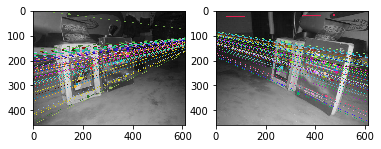

In [17]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1     = cv.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1     = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2    = cv.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2    = lines2.reshape(-1, 3)
img3,img4 = drawlines(img2, img1, lines2, pts2, pts1)
plt.subplot(121), plt.imshow(img5)
plt.subplot(122), plt.imshow(img3)
plt.show()

왼쪽 이미지에서 모든 에피 실이 이미지 외부의 한 지점에 수렴한다는 것을 알 수 있습니다. 그 모임 지점은 에피 폴입니다.

더 나은 결과를 얻으려면 해상도가 좋고 비평면이 많은 이미지를 사용해야합니다.

#### Additional Resources

#### Exercises
1. 한 가지 중요한 주제는 카메라의 전진 운동입니다. 그런 다음 에피 폴은 동일한 지점에서 고정 점에서 나오는 에필틴과 함께 표시됩니다. [이 토론을 참조하십시오 .](http://answers.opencv.org/question/17912/location-of-epipole/)

2. 기본 행렬 추정은 일치 항목, 특이 치 등의 품질에 민감합니다. 선택한 모든 일치 항목이 동일한 평면에있을 때 상황이 악화됩니다. [이 토론을 확인하십시오 .](http://answers.opencv.org/question/18125/epilines-not-correct/)